#**PRUEBA UNITARIA MODELO: Redes LSTM**

In [ ]:
# Importar las librerias
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el archivo csv desde drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Clima_sin_Presion.csv"
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Codificar columnas categoricas
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Definir atributos y clase
X = df.drop("Condition", axis=1)
y = df["Condition"]
print("Clases:", label_encoders["Condition"].classes_)

Clases: ['Cloudy' 'Considerably Cloudy' 'Fair' 'Fog' 'Haze' 'Heavy Rain'
 'Heavy T-Storm' 'Mist' 'Rain' 'Thunder']


In [ ]:
# Normalizar atributos
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = X.reshape((X.shape[0], 1, X.shape[1])) # Convertir a tensores LSTM


# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# Paso 6: Crear el modelo LSTM
model = Sequential(name="LSTM_Weather_Classifier")
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(len(np.unique(y)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM_Weather_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,826 (73.54 KB)

 Trainable params: 18,826 (73.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Paso 7: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.3418 - loss: 1.7853 - val_accuracy: 0.4354 - val_loss: 1.4369
Epoch 2/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.4479 - loss: 1.4127 - val_accuracy: 0.4780 - val_loss: 1.3364
Epoch 3/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4884 - loss: 1.3239 - val_accuracy: 0.5162 - val_loss: 1.2750
Epoch 4/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5111 - loss: 1.2695 - val_accuracy: 0.5220 - val_loss: 1.2283
Epoch 5/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5284 - loss: 1.2245 - val_accuracy: 0.5430 - val_loss: 1.1912
Epoch 6/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5462 - loss: 1.1870 - val_accuracy: 0.5510 - val_loss: 1.1626
Epoch 7/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5645 - loss: 1.1543 - val_accuracy: 0.5692 - val_loss: 1.1403
Epoch 8/100
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5695 - 

788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


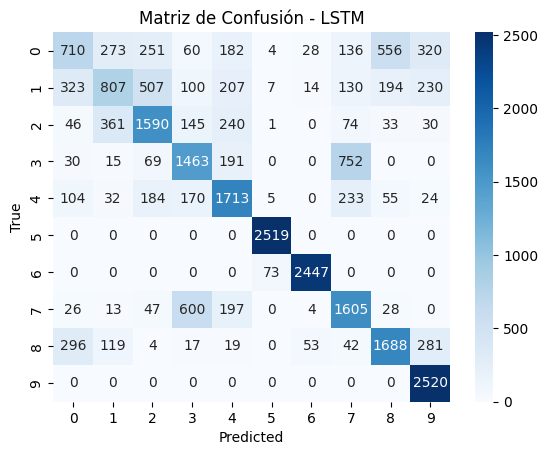

Accuracy: 0.6771441044568798

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.28      0.35      2520
           1       0.50      0.32      0.39      2519
           2       0.60      0.63      0.61      2520
           3       0.57      0.58      0.58      2520
           4       0.62      0.68      0.65      2520
           5       0.97      1.00      0.98      2519
           6       0.96      0.97      0.97      2520
           7       0.54      0.64      0.58      2520
           8       0.66      0.67      0.67      2519
           9       0.74      1.00      0.85      2520

    accuracy                           0.68     25197
   macro avg       0.66      0.68      0.66     25197
weighted avg       0.66      0.68      0.66     25197



In [ ]:
# Evaluacion del modelo
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión - LSTM")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))